<a href="https://colab.research.google.com/github/whdid502/stt_model_project/blob/feature_extraction/feature_extraction_mfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install librosa
# !pip install torch
# !pip install torchaudio
# !pip install python_speech_features
# !pip install scipy
# !pip install fastai --user

In [1]:
import torch
import platform
import numpy as np
from torch import (
    Tensor,
    FloatTensor
)

In [3]:
import wave
import os

pmc2wav

In [4]:
def pcm2wav( pcm_file, wav_file, channels=1, bit_depth=16, sampling_rate=16000 ):

    # Check if the options are valid.
    if bit_depth % 8 != 0:
        raise ValueError("bit_depth "+str(bit_depth)+" must be a multiple of 8.")
        
    # Read the .pcm file as a binary file and store the data to pcm_data
    with open( pcm_file, 'rb') as opened_pcm_file:
        pcm_data = opened_pcm_file.read();
        
        obj2write = wave.open( wav_file, 'wb')
        obj2write.setnchannels( channels )
        obj2write.setsampwidth( bit_depth // 8 )
        obj2write.setframerate( sampling_rate )
        obj2write.writeframes( pcm_data )
        obj2write.close()

pcm2wav( '/content/drive/My Drive/googledrive/feature_test/KsponSpeech_000002.pcm', '/content/drive/My Drive/googledrive/feature_test/KsponSpeech_000002.wav', 1, 16, 16000 )

In [8]:
from collections import namedtuple
import random
import torch
import torchaudio
from torchaudio import transforms
import matplotlib.pyplot as plt

In [9]:
from IPython.display import Audio

In [11]:
from collections import namedtuple
import random

import torch
import torchaudio
from torchaudio import transforms

In [15]:
import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

load audio

In [97]:
def load_audio_file(file_path):
    data = librosa.core.load(file_path,sr=22050)[0]
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 14, len(data)), data)
    plt.show()

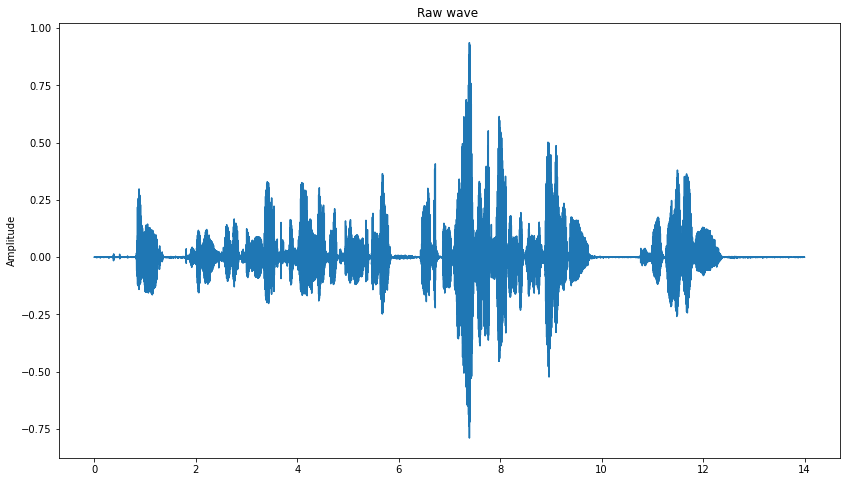

In [98]:
data = load_audio_file("/content/drive/My Drive/googledrive/feature_test/KsponSpeech_000002.wav")
plot_time_series(data)

In [112]:
print(data)
print(data.shape)

[0.00086217 0.00097458 0.00082878 ... 0.00071318 0.00066359 0.        ]
(233510,)


In [103]:
ipd.Audio(data, rate=22050)

noise injector

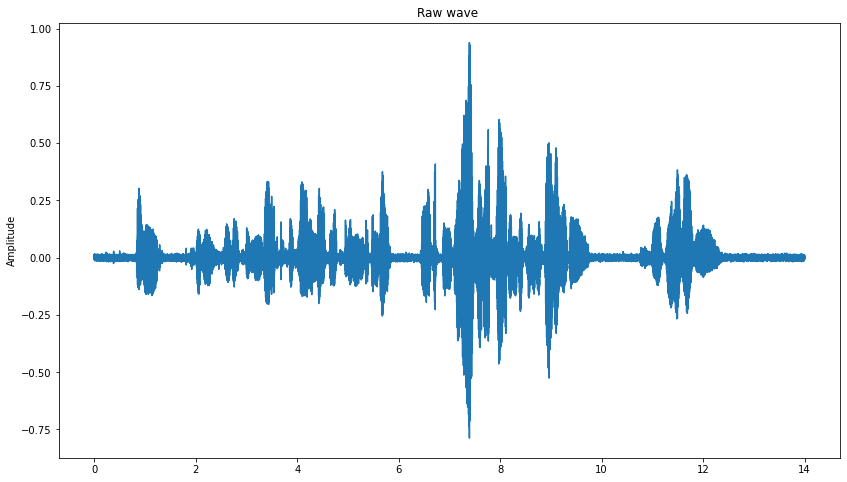

[-3.89499125e-03  5.91260966e-03 -2.72261541e-03 ... -7.48718297e-05
 -3.46873519e-03 -1.56648178e-03]
(233510,)


In [113]:
wn = np.random.randn(len(data))
data_wn = data + 0.005*wn
plot_time_series(data_wn)
ipd.Audio(data_wn, rate=22050)
print(data_wn)
print(data_wn.shape)

wav to mfcc

In [114]:
mfcc_pre = librosa.feature.mfcc(data, sr=22050)
print(mfcc_pre)#소음이 추가되지 않은 feature
print(mfcc_pre.shape)

[[-5.41300052e+02 -5.41268916e+02 -5.40413185e+02 ... -5.55519266e+02
  -5.58760683e+02 -5.60203239e+02]
 [ 3.29298068e+01  3.31554094e+01  3.41783367e+01 ...  1.35772461e+01
   9.78844095e+00  8.64527638e+00]
 [ 2.63351424e+01  2.70007181e+01  2.74415434e+01 ...  9.83099994e+00
   7.71012137e+00  8.23034175e+00]
 ...
 [ 9.75293490e-01  1.79356695e+00  2.12895150e+00 ...  4.22512982e+00
   4.56091924e+00  4.49593755e+00]
 [ 8.16021571e-01  1.23850092e+00  1.01126598e+00 ...  2.48540723e+00
   3.04443865e+00  4.37947148e+00]
 [ 5.31012702e-01  7.93447123e-01  7.09678717e-01 ...  2.17814945e+00
   2.73211232e+00  4.06297404e+00]]
(20, 457)


In [109]:
mfcc = librosa.feature.mfcc(data_wn, sr=22050)
print(mfcc)#소음이 추가된 feature
print(mfcc.shape)

[[-3.27834439e+02 -3.16993327e+02 -3.14327104e+02 ... -3.13167793e+02
  -3.20975082e+02 -3.29253669e+02]
 [-9.02171670e+00 -6.77366238e-01  2.66556054e+00 ...  2.25232209e+00
  -5.12807330e+00 -1.08442950e+01]
 [ 3.44176001e+00  2.58111765e-01  2.25755203e+00 ...  1.06366355e+00
   1.35420752e+00 -3.06285925e+00]
 ...
 [-3.30123793e+00 -3.43664454e+00 -4.43472938e+00 ...  9.33677048e-01
   7.81672563e-01  3.88419987e+00]
 [-7.10987619e-01  7.04997479e-01  1.54732743e+00 ...  1.60274140e+00
   2.65698524e+00  4.86831689e+00]
 [ 4.60112048e+00  1.21310711e+00 -1.03117439e+00 ...  7.17476665e-01
  -3.36246515e+00 -2.45461266e+00]]
(20, 457)


In [35]:

sample = '/content/drive/My Drive/googledrive/feature_test/KsponSpeech_000002.wav'
AudioData = namedtuple('AudioData', ['sig', 'sr'])
audio = AudioData(*torchaudio.load(sample))
audio

AudioData(sig=tensor([[0.0009, 0.0009, 0.0009,  ..., 0.0007, 0.0007, 0.0006]]), sr=16000)

In [36]:
def check_audio(aud):
    display(Audio(data=aud.sig, rate=aud.sr))

check_audio(audio)

In [14]:
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

NameError: ignored

noise injector

In [ ]:
wn = np.random.randn(len(data))
data_wn = data + 0.005*wn
plot_time_series(data_wn)
# We limited the amplitude of the noise so we can still hear the word even with the noise, 
#which is the objective
ipd.Audio(data_wn, rate=16000)

wav to spectogram

Shape of waveform: torch.Size([1, 50368])
Sample rate of waveform: 16000


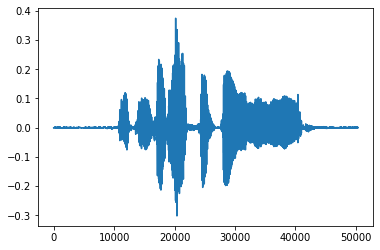

In [70]:
filename = "/content/drive/My Drive/googledrive/feature_test/KsponSpeech_000001.wav"
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

In [71]:
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0

params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": sample_rate,
}

torch.Size([250, 13])


tensor([[-57.0800,  -5.1740,   2.6128,  ..., -18.0461, -10.3563,   7.0126],
        [-55.8270,  -3.8053,   0.3157,  ..., -11.8766,   4.2372,  12.8182],
        [-55.3672,  -1.3554,   2.9593,  ...,  -0.2387,   0.9611,   9.8765],
        ...,
        [-55.1812,  -0.5930,   0.2034,  ...,   7.6356,   2.3958,  -3.2610],
        [-54.4846,   4.9639,   1.4943,  ..., -20.3306, -12.3616,  -7.6177],
        [-52.9045,   1.0403,   4.3024,  ...,  -9.2026,  10.7405,  -4.9691]])

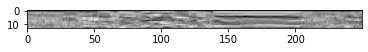

In [76]:
mfcc = torchaudio.compliance.kaldi.mfcc(waveform, **params)

# print("Shape of mfcc: {}".format(mfcc.size()))

print(mfcc.shape)
plt.figure()
plt.imshow(mfcc.t().numpy(), cmap='gray')
mfcc

Wav length: 10.59, Mel_S shape:(40, 1060)


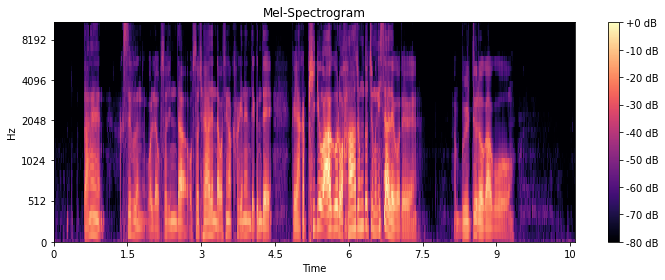

In [61]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

frame_length = 0.025
frame_stride = 0.010

def Mel_S(wav_file):
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr=16000)

    wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))


    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.savefig('Mel-Spectrogram example.png')
    plt.show()

    return S
man_original_data = '/content/drive/My Drive/googledrive/feature_test/KsponSpeech_000002.wav'
spectro = Mel_S(man_original_data)

In [ ]:
spectro = tfm_spectro(audio, ws=512, hop=256, n_mels=128, to_db_scale=True, f_max=8000, f_min=-80)

In [66]:
def tfm_spectro(ad:Audio, sr=16000, to_db_scale=False, n_fft=1024, 
                ws=None, hop=None, f_min=0.0, f_max=-80, pad=0, n_mels=128):
    # We must reshape signal for torchaudio to generate the spectrogram.
    mel = transforms.MelSpectrogram(sr=ad.sr, n_mels=n_mels, n_fft=n_fft, ws=ws, hop=hop, 
                                    f_min=f_min, f_max=f_max, pad=pad,)(ad.sig.reshape(1, -1))
    mel = mel.permute(0,2,1) # swap dimension, mostly to look sane to a human.
    if to_db_scale: mel = transforms.SpectrogramToDB(stype='magnitude', top_db=f_max)(mel)
    return mel

In [69]:
spectro = tfm_spectro(audio, ws=512, hop=256, n_mels=128, to_db_scale=True, f_max=8000, f_min=-80)

TypeError: ignored

timewrap

In [62]:
def time_warp(spec, W=5):
    num_rows = spec.shape[1]
    spec_len = spec.shape[2]
    device = spec.device
    
    y = num_rows//2
    horizontal_line_at_ctr = spec[0][y]
    assert len(horizontal_line_at_ctr) == spec_len
    
    point_to_warp = horizontal_line_at_ctr[random.randrange(W, spec_len - W)]
    assert isinstance(point_to_warp, torch.Tensor)

    # Uniform distribution from (0,W) with chance to be up to W negative
    dist_to_warp = random.randrange(-W, W)
    src_pts, dest_pts = (torch.tensor([[[y, point_to_warp]]], device=device), 
                         torch.tensor([[[y, point_to_warp + dist_to_warp]]], device=device))
    warped_spectro, dense_flows = sparse_image_warp(spec, src_pts, dest_pts)
    return warped_spectro.squeeze(3)

In [63]:
time_warp(spectro)

IndexError: ignored

torchaudio_setting

In [25]:
import torch
import torchaudio
import matplotlib.pyplot as plt

Shape of waveform: torch.Size([1, 50368])
Sample rate of waveform: 16000


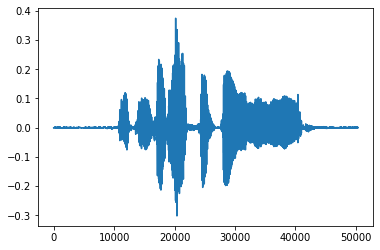

In [26]:
filename = "/content/drive/My Drive/googledrive/feature_test/KsponSpeech_000001.wav"
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

In [27]:
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0

params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": sample_rate,
}

mfcc(torchaudio)

Shape of mfcc: torch.Size([250, 13])
torch.Size([250, 13])


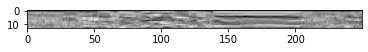

In [29]:
mfcc = torchaudio.compliance.kaldi.mfcc(waveform, **params)

print("Shape of mfcc: {}".format(mfcc.size()))

print(mfcc.shape)
plt.figure()
plt.imshow(mfcc.t().numpy(), cmap='gray')

fbank(torchaudio)

Shape of fbank: torch.Size([250, 23])


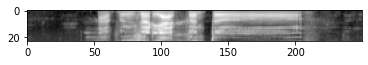

In [30]:
fbank = torchaudio.compliance.kaldi.fbank(waveform, **params)

print("Shape of fbank: {}".format(fbank.size()))

plt.figure()
plt.imshow(fbank.t().numpy(), cmap='gray')